# 膨胀卷积
- 个人理解<sup>ruuner</sup>: 膨胀卷积可以扩大感受野，不会增加计算量。

## 1. 膨胀卷积（空洞卷积）
- 膨胀卷积（dilated convolution）是卷积核中存在空洞，膨胀卷积的卷积核大小为 $k \times k$，空洞大小为 $d$，dilation rate为 $d$

### 1.2 膨胀卷积和传统卷积工作机制的区别：

_N.B.: 灰色为卷积核，青色为输出特征图，蓝色为输入特征图._


<table style="width:100%; table_layout:fixed;">
    <tr>
        <td style="text-align: center;"><img width="500px" src="./gif/no_padding_strides.gif"></td>
        <td style="text-align: center;"><img width="500px" src="./gif/dilation.gif"></td>
    </tr>
    <tr>
        <td style="text-align: center;"> 标准卷积 kernel_size=3×3, s=1 </td>
        <td style="text-align: center;"> 膨胀卷积 kernel_size=3×3, s=1, d=2</td>
    </tr>
</table>

## 2. Gridding Effect

<center>
     <img width="1000px" src="./assert/griding_effect.png" />
</center>
<br>

> source= https://arxiv.org/abs/1702.08502

### 2.1 标准卷积
> **注意感受野的变化**

_N.B.: 注意每一层卷积后的感受野变化._


<table style="width:100%; table_layout:fixed;">
    <tr>
        <td style="text-align: center;"><img width="200px" src="./assert/conv_1.png"></td>
        <td style="text-align: center;"><img width="200px" src="./assert/conv_2.png"></td>
        <td style="text-align: center;"><img width="200px" src="./assert/conv_3.png"></td>
    </tr>
    <tr>
        <td style="text-align: center;"> NO.1: k=3×3, s=1</td>
        <td style="text-align: center;"> NO.2: k=3×3, s=1</td>
        <td style="text-align: center;"> NO.3: k=3×3, s=1</td>
    </tr>
</table>

## 2.2 膨胀卷积（d=2）

_N.B.: 注意每一层卷积后的感受野变化._


<table style="width:100%; table_layout:fixed;">
    <tr>
        <td style="text-align: center;"><img width="450px" src="./assert/dilat_d2_1.png"></td>
        <td style="text-align: center;"><img width="450px" src="./assert/dilat_d2_2.png"></td>
        <td style="text-align: center;"><img width="450px" src="./assert/dilat_d2_3.png"></td>
    </tr>
    <tr>
        <td style="text-align: center;"> NO.1: k=3×3, s=1，d=2</td>
        <td style="text-align: center;"> NO.2: k=3×3, s=1，d=2</td>
        <td style="text-align: center;"> NO.3: k=3×3, s=1，d=2</td>
    </tr>
</table>

## 膨胀卷积（d=1 -> d=2 -> d=3）

_N.B.: 注意每一层卷积后的感受野变化._


<table style="width:100%; table_layout:fixed;">
    <tr>
        <td style="text-align: center;"><img width="450px" src="./assert/dilat_d1.png"></td>
        <td style="text-align: center;"><img width="450px" src="./assert/dilat_d2.png"></td>
        <td style="text-align: center;"><img width="450px" src="./assert/dilat_d3.png"></td>
    </tr>
    <tr>
        <td style="text-align: center;"> NO.1: k=3×3, s=1, d=1</td>
        <td style="text-align: center;"> NO.2: k=3×3, s=1, d=2</td>
        <td style="text-align: center;"> NO.3: k=3×3, s=1, d=3</td>
    </tr>
</table>

## 3. 膨胀因子设定

<table style="width:100%; table_layout:fixed;">
    <tr>
        <td style="text-align: center;"><img width="600px" src="./assert/setting.png"></td>
        <td style="text-align: center;"><img width="600px" src="./assert/setting_2.png"></td>
    </tr>
    <tr>
        <td style="text-align: center;"> 锯齿状大小分布规律 </td>
        <td style="text-align: center;"> d 的公约数不能大于 1 ；否则会出现 0 。</td>
    </tr>
</table>
<br>

> source= https://arxiv.org/abs/1702.08502

## 4. 膨胀卷积的可视化

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


def dilated_conv_one_pixel(center: (int, int),
                           feature_map: np.ndarray,
                           k: int = 3,
                           r: int = 1,
                           v: int = 1):
    """
    膨胀卷积核中心在指定坐标center处时，统计哪些像素被利用到，
    并在利用到的像素位置处加上增量v
    Args:
        center: 膨胀卷积核中心的坐标
        feature_map: 记录每个像素使用次数的特征图
        k: 膨胀卷积核的kernel大小
        r: 膨胀卷积的dilation rate
        v: 使用次数增量
    """
    assert divmod(3, 2)[1] == 1

    # left-top: (x, y)
    left_top = (center[0] - ((k - 1) // 2) * r, center[1] - ((k - 1) // 2) * r)
    for i in range(k):
        for j in range(k):
            feature_map[left_top[1] + i * r][left_top[0] + j * r] += v


def dilated_conv_all_map(dilated_map: np.ndarray,
                         k: int = 3,
                         r: int = 1):
    """
    根据输出特征矩阵中哪些像素被使用以及使用次数，
    配合膨胀卷积k和r计算输入特征矩阵哪些像素被使用以及使用次数
    Args:
        dilated_map: 记录输出特征矩阵中每个像素被使用次数的特征图
        k: 膨胀卷积核的kernel大小
        r: 膨胀卷积的dilation rate
    """
    new_map = np.zeros_like(dilated_map)
    for i in range(dilated_map.shape[0]):
        for j in range(dilated_map.shape[1]):
            if dilated_map[i][j] > 0:
                dilated_conv_one_pixel((j, i), new_map, k=k, r=r, v=dilated_map[i][j])

    return new_map


def plot_map(matrix: np.ndarray):
    plt.figure()

    c_list = ['white', 'blue', 'red']
    new_cmp = LinearSegmentedColormap.from_list('chaos', c_list)
    plt.imshow(matrix, cmap=new_cmp)

    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, matrix.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, matrix.shape[0], 1), minor=True)

    # 显示color bar
    plt.colorbar()

    # 在图中标注数量
    thresh = 5
    for x in range(matrix.shape[1]):
        for y in range(matrix.shape[0]):
            # 注意这里的matrix[y, x]不是matrix[x, y]
            info = int(matrix[y, x])
            ax.text(x, y, info,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color="white" if info > thresh else "black")
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1.5)
    plt.show()
    plt.close()


def main(dilated_rates):
    # bottom to top
    dilated_rates = dilated_rates
    # init feature map
    size = 31
    m = np.zeros(shape=(size, size), dtype=np.int32)
    center = size // 2
    m[center][center] = 1
    # print(m)
    # plot_map(m)

    for index, dilated_r in enumerate(dilated_rates[::-1]):
        new_map = dilated_conv_all_map(m, r=dilated_r)
        m = new_map
    # print(m)
    plot_map(m)


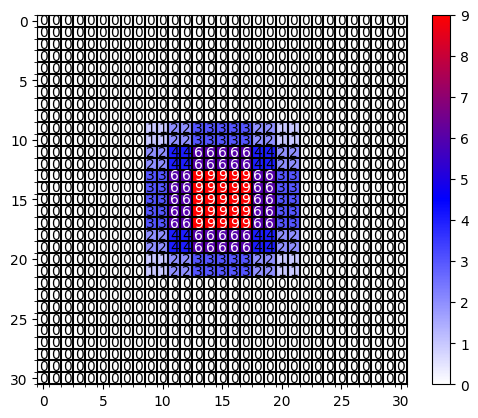

In [4]:
main([1, 2, 3])